# Lab 4 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Convolução e CNN

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Aplicação de filtros em imagens por meio de convolução
- Modelagem de uma rede de convolução para o problema de classificação de gatos/não gatos.
- Notebook baseado em tensorflow e Keras.

Data da entrega : 11/02

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/tLfswSMCMaQxmm9Y6)


# Aplicando filtros e entendendo padding, stride e pooling (30pt)

A primeira etapa é importar os pacotes e montar o drive

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras import datasets, layers, models
import os
import skimage
from skimage import io
from skimage.io import imread
from skimage.transform import resize
import numpy as np
import h5py

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Além dos passos anteriores, também iremos carregar uma imagem no disco para usá-la como exemplo para as próximas funções. (Imagem disponível na pasta de *Datasets* da disciplina)

sample image shape:  (512, 512, 3)


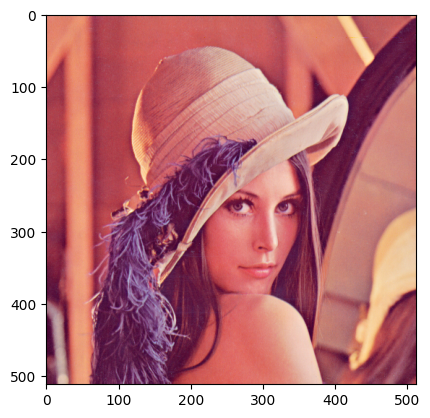

In [3]:
sample_image = imread("/content/drive/MyDrive/Lenna.png")
sample_image= sample_image.astype(float)

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

Veja o shape da imagem:

In [4]:
sample_image.shape

(512, 512, 3)

## Criando e aplicando um filtro com convolução (10pt)

Utilize o `TF/Keras` para aplicar o filtro. Observe que nesta etapa não há necessidade de treinamento algum. O código abaixo cria 3 filtros de tamanho $5\times5$, e adiciona *padding* de forma a manter a imagem de saída (filtrada) do mesmo tamanho da imagem de entrada (`padding ="same"`).

O objetivo do código abaixo é criar um objeto sequencial com apenas uma camada de convolução do tipo `tf.keras.layers.Conv2D`.

In [5]:
conv = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3))
])
conv.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, None, None, 3)

In [6]:
conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, None, None, 3)       │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

Quando usamos `TF/kertas`, as convoluções esperam vetores no formato : `(batch_size, dim1, dim2, dim3)`. Ou seja, a primeria posição é o tamanho do lote.

Uma imagem isolada é considerada um lote de tamanho 1, portanto, deve-se expandir mais uma dimenão do tensor.

In [7]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 512, 512, 3)

Agora, pode-se aplicar a convolução. Aplique a convolução na imagem de exemplo (expandida) e verifique o tamanho da imagem resultante (`img_out`). Use a função `predict` do objeto `conv` para aplicar a convolução.

In [8]:
img_out = conv(img_in)
img_out.shape

TensorShape([1, 512, 512, 3])

Plote as imagens lado a lado e observe o resultado. O parâmetro "same" no padding aplica um padding automático no sentido de garantir que a saída tenha o mesmo tamanho da entrada.
Lembre-se que o padding adiciona zeros nas bordas da imagem, antes da aplicação da convolução.

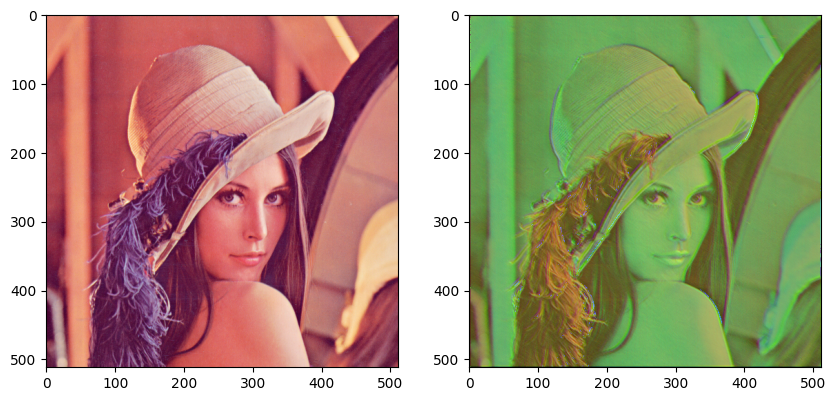

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(img_out[0].numpy().astype('uint8'));

Agora, crie **um** único filtro de tamanho $5\times5$, e adicione *padding* oposto ao anterior (`valid` ao invés de `same`).

In [10]:
conv2 = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="valid",
    input_shape=(None, None, 3))
])
conv2.output_shape

(None, None, None, 3)

Um filtro $5\times5\times3$ tem a profundidade do filtro de acordo com a entrada, ou seja, tem-se $5 \times 5 \times 3 = 75$ valores que serão convoluídos pela imagem. Detalhe importante: **não se esqueça do bias! **.

In [11]:
conv2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, None, None, 3)       │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
img_out = conv2(img_in)
img_out[0].shape

TensorShape([508, 508, 3])

**ToDo:** O que você observou no shape após a troca no conteúdo do *padding*?

```
Quando troca o conteúdo do padding, o shpae de saída da camada convolucional foi alterado. Quando utiliza passing="same", a saída mantém as mesmas dimensões espaciais da entrada, pois o preenchimento adiciona valores nas bordas da imagem. Com o padding-"valid", não há preenchimento adicional, fazendo com que a saída tenha dimensões menores do que a entrada, pois os filtros são aplicados apenas em regiões válidas da matriz.
```

Como tivemos que expandir a primeira dimensao para aplicar a convolução, podemos remover a dimensão unitária para plotar a imagem, usando a função `squeeze()`

In [13]:
i = img_out[0].numpy().squeeze()
i.shape

(508, 508, 3)

Agora com isso feito, é possível plotar as duas imagens lado a lado.

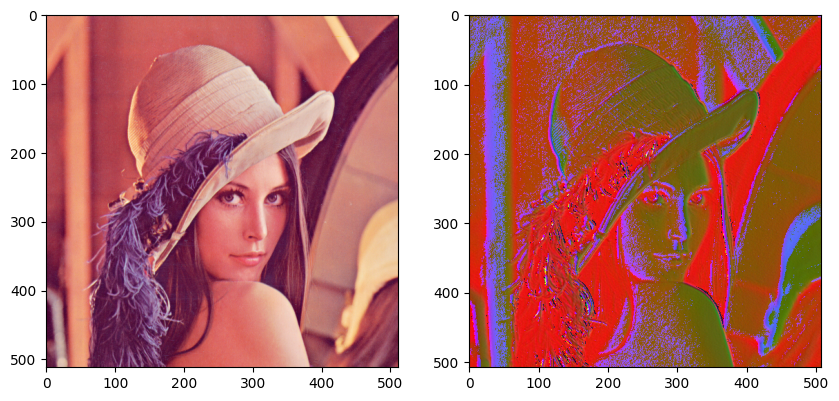

In [14]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
i = img_out[0].numpy().squeeze()
ax1.imshow(i.astype('uint8'));

**ToDo:** O que você observou nas imagens resultantes após a troca no conteúdo do *padding*?

```
 As bordas das imagens ficaram diferentes.
```

## Inicializando os filtros manualmente (10pt)


A função abaixo inicializa um array de dimensões 5,5,3,3 com todas as posições zero, exceto as posições 5,5,0,0 , 5,5,1,1 e 5,5,2,2 que recebem o valor 1/25.

In [15]:
def my_filter(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    array[:, :, 0, 0] = 1. / 25
    array[:, :, 1, 1] = 1. / 25
    array[:, :, 2, 2] = 1. / 25
    return array

A transposição pode ser usada para facilitar a visualização da matriz resultante.

In [16]:
np.transpose(my_filter(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

A função definida acima é usada para carregar valores nos filtros, e ela pode ser usada para pré-inicializar os filtros do objeto `conv3` o qual possui uma convolução 2D.

In [17]:
conv3 = Sequential([
     Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_filter)
])
conv3.output_shape

(None, None, None, 3)

## Plote e observe o que aconte com a imagem (5pt)



Agora vamos testar o filtro criado na imagem de exemplo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


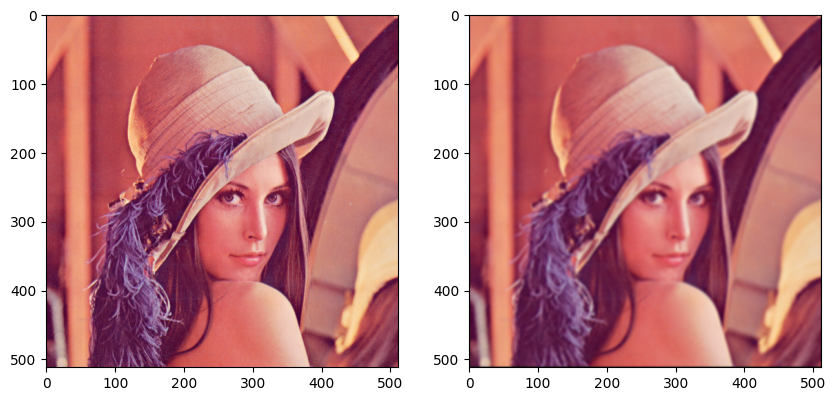

In [18]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv3.predict(img_in)[0].astype('uint8'));

**ToDo:** O que você observou após a aplicação do filtro criado manualmente na imagem original?

```
A imagem ficou borrada.
```

## Criando um filtro de borda (5pt)

Crie uma nova função para gerar um filtro de borda nos 3 canais da imagem de entrada. O filtro deve ter o formato $3\times3$ e ter o formato $[[0, 0.2, 0], [0, -0.2, 0], [0, 0, 0]]$

In [19]:
def my_new_filter(shape=(1, 3, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    array[:,:,0,:] = [0 ,0 ,0]
    array[:,:,1,:] = [0.2,-0.2, 0]
    array[:,:,2,:] = [0, 0, 0]
    return array

Inicialize o objeto `conv4` com seu novo filtro e aplique na imagem de entrada

In [20]:
conv4 = Sequential([
     Conv2D(filters=3, kernel_size=(5, 5), padding="same",
      input_shape=(None, None, 3), kernel_initializer=my_new_filter)
])
conv4.output_shape

(None, None, None, 3)

Agora vamos plotar a imagem resultante.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


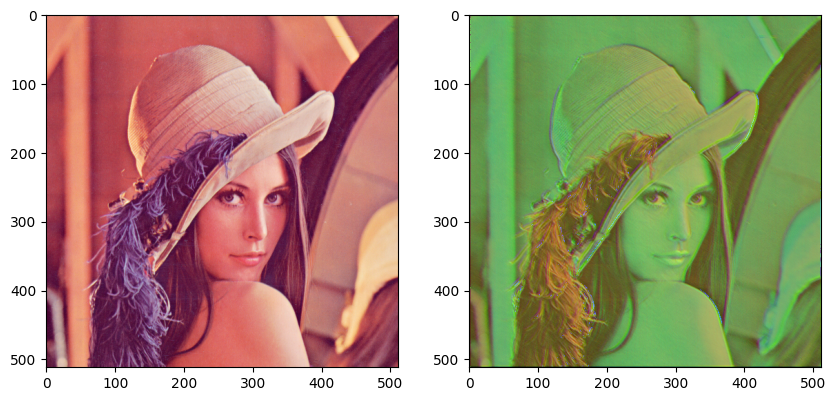

In [21]:
# Plote as duas iamgens lado a lado (filtrada e não filtrada)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv.predict(img_in)[0].astype('uint8'));

**ToDo:** O que você observou após a aplicação do filtro criado manualmente na imagem original?

```
fica com cor difrente e é aleatório.
```

# Classificando imagens de gatos e cães (70pt)




Antes de qualquer coisa, primeiro é necessário carregar os dados.

## Carregando os dados de Gato e Não Gato (10pt)

Aqui você precisa carregar os dados e normalizá-los também. Nesta prática em específico, não é necessária a vetorização dos dados.

In [22]:
# ToDo: Preencha aqui

def _load_data():
  train_dataset = h5py.File('/content/drive/MyDrive/treino_teste/train_catvnoncat.h5', "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File('/content/drive/MyDrive/treino_teste/test_catvnoncat.h5', "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

treino_x_orig, treino_y, teste_x_orig, teste_y, classes = _load_data()

Observe o formato dos dados:

In [23]:
print(f'Shape dos dados de treino: {treino_y.shape}')
print(f'Shape dos dados de teste : {teste_y.shape}')

print(f'Shape dos dados de treino: {treino_y.squeeze().shape}')
print(f'Shape dos dados de teste : {teste_y.squeeze().shape}')

treino_y = treino_y.squeeze()
teste_y = teste_y.squeeze()

Shape dos dados de treino: (1, 209)
Shape dos dados de teste : (1, 50)
Shape dos dados de treino: (209,)
Shape dos dados de teste : (50,)


Dependendo da forma como você carregou os dados de rótulos, pode ser que ele tenha mais de uma dimensão. Se este for o seu caso, você pode usar a função `squeeze()` para o vetor de rótulos ficar somente com uma dimensão.

## Implementando a rede (20pt)

Implemente uma rede de convolução simples, contendo 3 camadas de convolução seguidas de duas camadas densas (totalemtne conectadas) no final e por fim uma camada com ativação `sigmoid` para a classificação com um neurônio. Escolha filtros de tamanhos variados: (3,3) ou (5,5). Para cada camada, crie de 8 a 64 filtros.

Na camada densa, use de 64 a 256 neurônios.

In [38]:
# Implementa uma rede de convolução simples, chamada model

input_size = (treino_x_orig.shape[1], treino_x_orig.shape[2], 1)
n_classes = 40

model = models.Sequential()

model.add(layers.InputLayer(input_size) )

# ToDo : adicionar as outras camadas
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

model.add(layers.Flatten()) # não esqueça da camada flatten ..

model.add(layers.Dense(128,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid'))


Agora usaremos o comando `model.summary()` para conferir a arquitetura que você construiu.

In [39]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      29,491,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,510,273 (112.57 MB)

 Trainable params: 29,510,273 (112.57 MB)

 Non-trainable params: 0 (0.00 B)

## Preparando o modelo para treinamento (5pt)

Compile o modelo usando o método de otimização `adam` e função de custo (*loss*)`binary_categorical_crossentropy`.

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## Treinando o modelo (5pt)

Treine o modelo por 30 épocas com `batch_size` = 100.

In [41]:
history = model.fit(treino_x_orig, treino_y, epochs=30, batch_size=100, validation_split=0.2)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.6551 - loss: 3.5926 - val_accuracy: 0.7143 - val_loss: 1.6186
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5420 - loss: 2.7743 - val_accuracy: 0.2857 - val_loss: 3.8123
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3429 - loss: 3.1912 - val_accuracy: 0.2857 - val_loss: 1.3284
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.3595 - loss: 1.0970 - val_accuracy: 0.7143 - val_loss: 0.6336
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6171 - loss: 0.6545 - val_accuracy: 0.7143 - val_loss: 0.6141
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.6571 - loss: 0.6623 - val_accuracy: 0.7143 - val_loss: 0.6098
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6471 - loss: 0.6566 - val_accuracy: 0.7143 - val_loss: 0.6130
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6338 - loss: 0.6469 - val_accuracy: 0.7143 - val_loss: 0.5941
Epoch 9/30
2/2 ━

O retorno da função `fit()` é um objeto para armazenar o histórico do treino.

In [42]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Plote a acurácia e o custo (loss) do treino e da validação.

7/7 - 1s - 125ms/step - accuracy: 0.9330 - loss: 0.2493


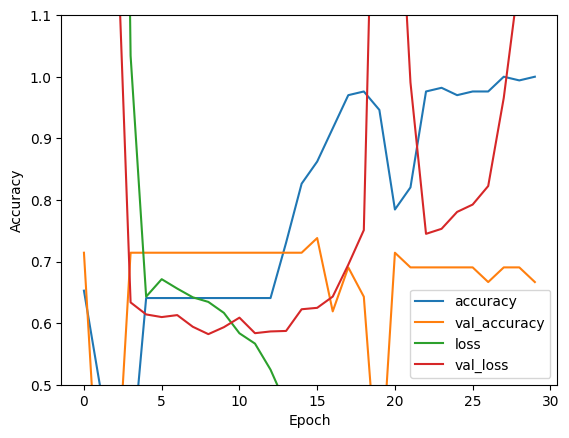

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

# ToDo: Coloque as suas variáveis de teste (x, y)
test_loss, test_acc = model.evaluate(treino_x_orig, treino_y, verbose=2)

Verificando a acurácia obtida:

In [45]:
print(test_acc)

0.9330143332481384


## Criando o seu próprio modelo (30pt)

O obejtivo é agora você testar o mesmo cenário, mas criando os seus próprios modelos. A sua tarefa é criar/testar dois modelos. Para isso, você está livre para testar o que quiser, desde a quantidade de camadas de convolução e densas, até as funções de *loss* e ativação. Inclusive, se quiser, pode utilizar camadas de *pooling*.

### Modelo 1 (10pt)

In [49]:
model1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Para classificação binária
])

# Compilação do modelo
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Exibir resumo do modelo
model1.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 53824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       6,889,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,909,121 (26.36 MB)

 Trainable params: 6,909,121 (26.36 MB)

 Non-trainable params: 0 (0.00 B)

### Modelo 2 (10pt)

In [48]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Regularização para evitar overfitting
    layers.Dense(1, activation='sigmoid')  # Para classificação binária
])

# Compilação do modelo
model2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Exibir resumo do modelo
model2.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,812,353 (18.36 MB)

 Trainable params: 4,812,353 (18.36 MB)

 Non-trainable params: 0 (0.00 B)

### Avaliando o modelo que você criou (10pt)

O que você consegue analisar olhando os modelos que você criou e o modelo proposto? Essa análise pode envolver custo computacional, memória, etc.

```
Durante a atividade, foram implementados diferentes modelos de redes convolucionais para classificação. O primeiro modelo desenvolvido foi uma estrutura básica utilizando camadas convolucionais seguidas de uma camada densa para a classificação. Esse modelo tinha um número reduzido de filtros e camadas, tornando-o eficiente em termos computacionais, mas possivelmente limitado na extração de características mais complexas.

Posteriormente, foram exploradas arquiteturas mais profundas, incorporando múltiplas camadas convolucionais, pooling e ativação ReLU, além de camadas densas mais robustas. Um dos modelos testados utilizou MaxPooling para reduzir a dimensionalidade das imagens e melhorar a eficiência do aprendizado. Além disso, a inclusão de Dropout em alguns experimentos ajudou a minimizar o overfitting.

Os modelos finais criados por mim apresentaram diferenças no tempo de treinamento, consumo de memória e desempenho de generalização. O modelo mais simples treinou rapidamente e exigiu menos recursos, enquanto o modelo mais profundo teve um desempenho potencialmente superior, mas com maior custo computacional. A escolha do melhor modelo depende do equilíbrio entre precisão e eficiência, sendo necessário testar diferentes hiperparâmetros para otimizar os resultados.
```